# Exercise 9.2

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Parameter set for high probability of negative values
kappa = 10
theta = 10

# Feller condition 2*kapppa*theta >= sigma**2
safety_buffer = abs(kappa * theta)
sigma = np.sqrt(2 * kappa * theta) - 1

delta = (4 * kappa * theta) / sigma

def c_bar(s, t):
    """ c bar as defined on exercise sheet"""
    return sigma**2 / (4*kappa) * (1 - np.exp(-kappa*(t-s)))

def kappa_bar(s, t, S0):
    """ kappa bar as defined on exercise sheet"""
    return ((( 4 * kappa * np.exp(-kappa*(t-s))) / (sigma**2 * (1 - np.exp(-kappa*(t-s))))) * S0)


def S_t_CIR(T, dt, S0):
    n = int(np.ceil(T / dt))
    S = np.zeros(n)
    S[0] = S0
    
    for i in range(n-1):
        """ advance S according to given distribution """
        S[i+1] = c_bar(i*dt, (i+1)*dt) * np.random.noncentral_chisquare(delta, kappa_bar(i*dt, (i+1)*dt, S[i]))
    
    return S

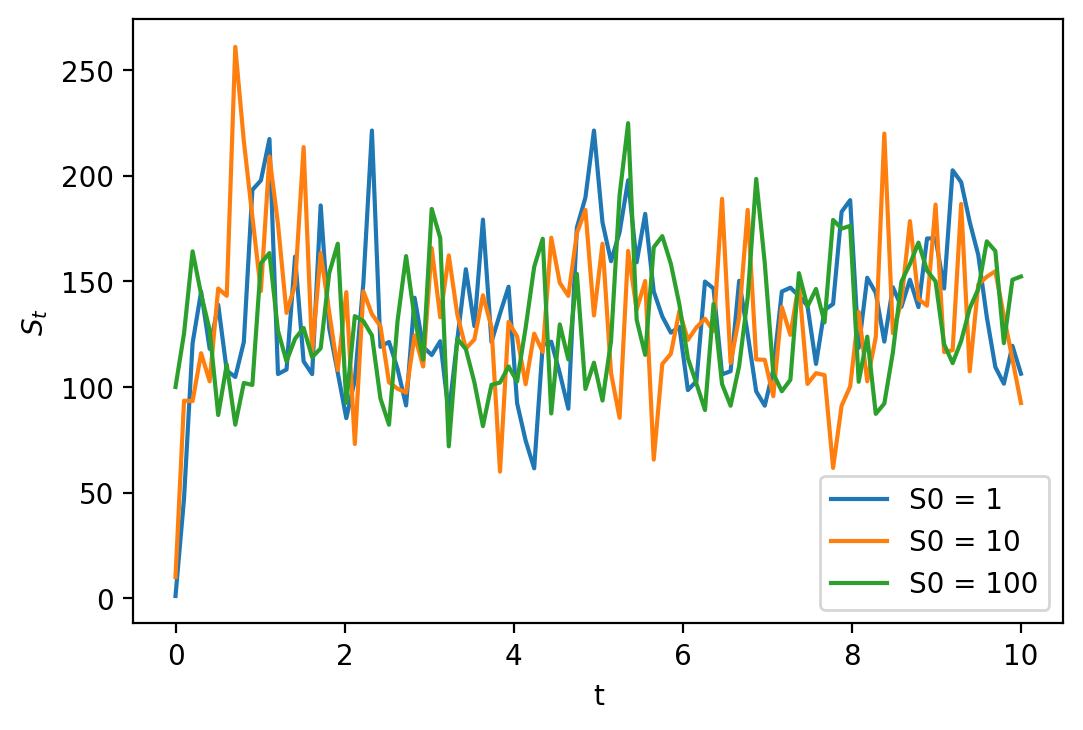

In [18]:
T = 10
dt = 0.1
n = int(np.ceil(T / dt))
t = np.linspace(0, T, n)

plt.figure(dpi=200)
plt.xlabel("t")
plt.ylabel(r"$S_t$")

for i in [1, 10, 100]:
    plt.plot(t, S_t_CIR(T, dt, i), label = 'S0 = {}'.format(i))
    
plt.legend()